# Code for 30000 neurons and 1000 training sample on [0,1]

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import eig
#import sympy as sym
#from sympy import *
import scipy as sc 


In [ ]:
from math import *
def NTK_Matrix1(m,n,lowb,uppb):
    np.random.seed(10)
    #initialization of a
    a=np.random.choice([-1,1],size=m)
    #initialization of the weights W
    W=np.random.normal(0, 1, size=m)
    #x1=np.random.uniform(0,1,size=(n,1))
    x = np.linspace(lowb,uppb,n)
    H=np.zeros((n,n))
    for i in range(n):
        print("--- Progress is ", str(round(i/n*100,2))," % ---")
        for j in range(i+1):
            s = np.array([[(a[r])**2*4*exp(-2*W[r]*x[i])*exp(-2*W[r]*x[j])*(W[r])**2, 
                          (W[r]*x[i]* (np.cosh(W[r]*x[i])-2)-2*np.sinh(W[r]*x[i]))   *  (W[r]*x[j]* (np.cosh(W[r]*x[j])-2)-2*np.sinh(W[r]*x[j])),
                          (1+exp(-W[r]*x[i]))**4    *    (1+exp(-W[r]*x[j]))**4] for r in range(m)])
            H[i,j] = H[i,j] + sum((s[:,0] * s[:,1])/s[:,2] )
            H[j,i] = H[i,j]

          #(W[r]*x[j]*(np.cosh(W[r]*x[j])-2)-2*np.sinh(W[r]*x[j]))#(W[r]*x[j]*(np.cosh(W[r]*x[j])-2)-2*np.sinh(W[r]*x[j]))/((1+exp(-W[r]*x[i]))**2*(1+exp(-W[r]*x[j]))**2)
    H=H/m
    return H

In [ ]:
H = NTK_Matrix1(30000,1000,0,1)

## Eigenvalues and Eigenvectors

In [ ]:
list_val=[]
val,vec=eig(H_30000)
# Sort in descresing order
val = np.sort(np.real(val))[::-1]
# Store eigenvalues
list_val.append(val)
print('Eigenvalues:', list_val)
print('Eigenvectors', vec)

## Plot of the eigenvalues

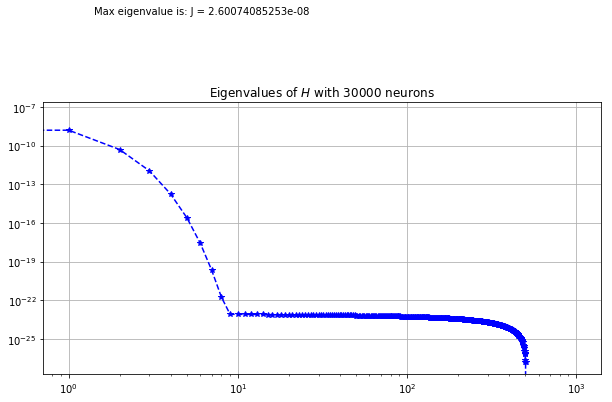

In [ ]:
f = plt.figure(figsize=(10,5))
for i in range(0, len(list_val), 1):
    plt.plot(list_val[i], 'b*--' )
s = 'Max eigenvalue is: J = '+str(round(list_val[0][0],19))
plt.text(1.41,1.52,s)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title(r'Eigenvalues of $H$ with 30000 neurons')
plt.show()

In [ ]:
H

In [ ]:
list_val=[]
val,vec=eig(H)
# Sort in descresing order
val = np.sort(np.real(val))[::-1]
# Store eigenvalues
list_val.append(val)
print('Eigenvalues:', list_val)
print('Eigenvectors', vec)

# Plot of the Eigenvalues 

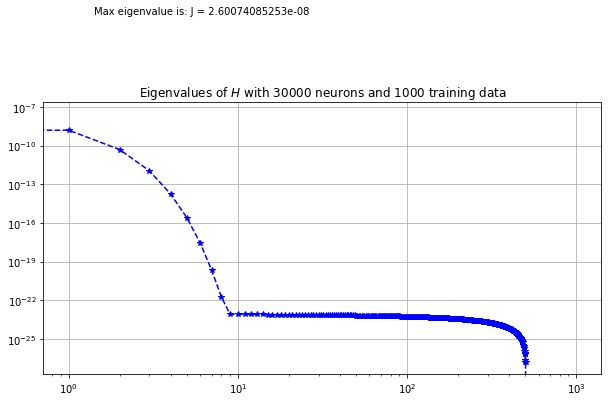

In [ ]:
f = plt.figure(figsize=(10,5))
for i in range(0, len(list_val), 1):
    plt.plot(list_val[i], 'b*--' )
s = 'Max eigenvalue is: J = '+str(round(list_val[0][0],19))
plt.text(1.41,1.52,s)
#plt.text(1.41,1.52, list_val[0][0])
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title(r'Eigenvalues of $H$ with 30000 neurons and 1000 training data')
plt.show()

## Frequencies of the Eigenvectors

In [ ]:
from numpy import fft
for i in range(H.shape[0]):
    y = vec[i]
    yf = np.fft.fft(y)
    yplot  =  fft.fftshift(yf)
    xf = fft.fftfreq(len(y), len(y))
    xf = fft.fftshift(xf)
    plt.plot(xf, np.abs(yplot[0:len(yplot)]))
    plt.grid()
    plt.show()

# Variance of the eEigenvectors

In [ ]:
listVarsFT   = list()
for i in range(H.shape[0]):
    y      = vec[i]
    yf     = sc.fft(y)
    listVarsFT.append(np.var(yf))
    

Text(0.5, 0, 'Index of Eignevector')

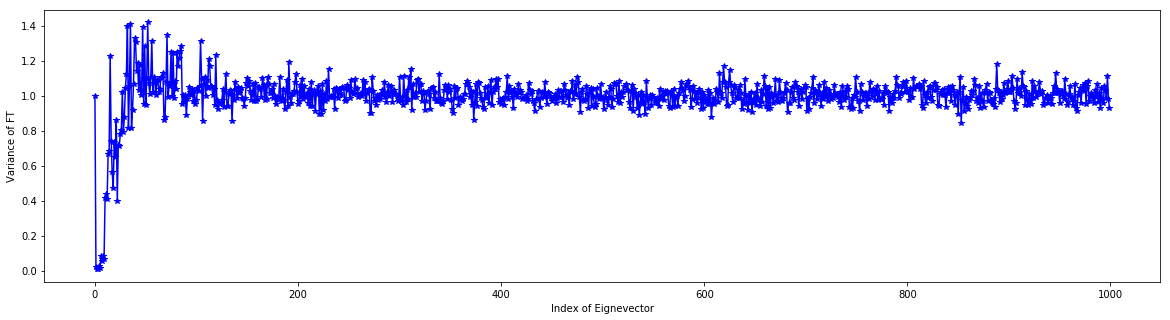

In [ ]:
f   = plt.figure(figsize=(20,5))
plt.plot(np.asarray(listVarsFT), "b*-")
plt.ylabel("Variance of FT")
plt.xlabel("Index of Eignevector")